In [96]:
#importazione pacchetti python necessari
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

# Esercizio 11.1

Voglio fittare la seguente funzione lineare con una rete neurale
$$
f(x)=2x+1
$$

In [4]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Generazione dei dati corrispondenti a $f(x)$ con un rumore di fondo aggiuntivo

In [42]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

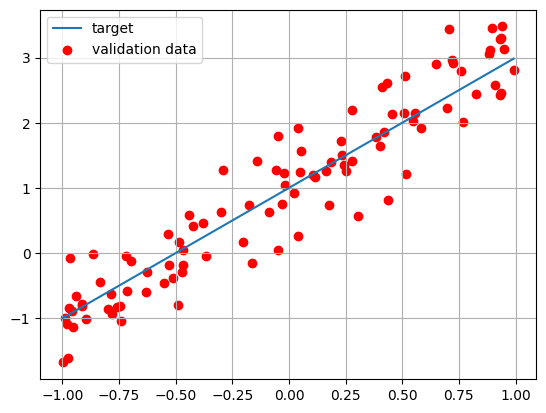

In [43]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Basta un solo neurone per fittare una funzione lineare!

In [44]:
# compose the NN model

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Allenamento della rete neurale

In [45]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 5ms/step - loss: 3.6843 - mse: 3.6843 - val_loss: 3.2019 - val_mse: 3.2019
Epoch 2/30
32/32 [==============================] - 0s 2ms/step - loss: 2.2526 - mse: 2.2526 - val_loss: 2.1044 - val_mse: 2.1044
Epoch 3/30
32/32 [==============================] - 0s 2ms/step - loss: 1.4886 - mse: 1.4886 - val_loss: 1.4435 - val_mse: 1.4435
Epoch 4/30
32/32 [==============================] - 0s 2ms/step - loss: 1.0328 - mse: 1.0328 - val_loss: 1.0274 - val_mse: 1.0274
Epoch 5/30
32/32 [==============================] - 0s 2ms/step - loss: 0.7508 - mse: 0.7508 - val_loss: 0.7577 - val_mse: 0.7577
Epoch 6/30
32/32 [==============================] - 0s 2ms/step - loss: 0.5709 - mse: 0.5709 - val_loss: 0.5742 - val_mse: 0.5742
Epoch 7/30
32/32 [==============================] - 0s 2ms/step - loss: 0.4510 - mse: 0.4510 - val_loss: 0.4557 - val_mse: 0.4557
Epoch 8/30
32/32 [==============================] - 0s 2ms/step - loss: 0.3758 - mse: 0.37

In [46]:
# return weights and biases
model.get_weights()

[array([[1.9990889]], dtype=float32), array([1.0076373], dtype=float32)]

In [47]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.2056 - mse: 0.2056

Test loss: 0.20561465620994568
Test accuracy: 0.20561465620994568


In [48]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 5.9193e-05 - mse: 5.9193e-05

Test loss: 5.9193262131884694e-05
Test accuracy: 5.9193262131884694e-05


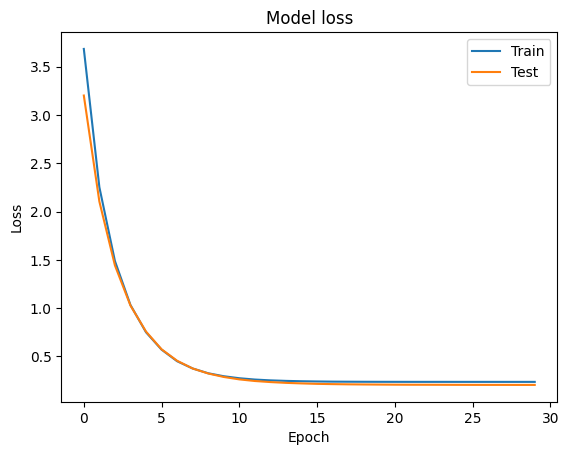

In [49]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Si nota che la funzione di loss per i dati di train e di test stanno convergendo un valore dato e diminuiscono entrambe molto lentamente con il numero di epoche, questo vuol dire che la nostra rete neurale è arrivata a convergenza, l'aggiunta di ulteriori epoche di training aumenterebbe solo il tempo di calcolo con pochissimo guadagno in performance. In più un ulteriore aumento delle epoche potrebbe causare overfitting del modello.

4/4 [==============================] - 0s 1ms/step


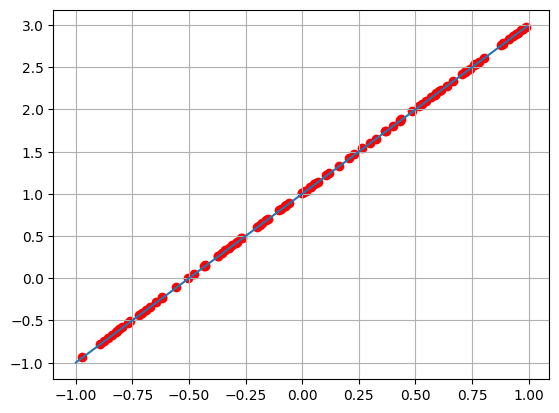

In [50]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

Variando i parametri $N_{epochs}$, $N_{train}$ e $\sigma$ è facile notare che all'aumento di sigma la rete neurale fa maggior fatica a fittare i dati, come è ovvio d'altra parte. Si nota anche che all'aumentare del numero di dati di training migliora la precisione del modello ma che per un numero di dati di training e una sigma fissata l'aumento del numero di epoche incrementa la precisione del modello solo fino a un certo punto oltre una certa soglia l'aumento del numero di epoche non cambia in maniera significaiva i risultati.

# Esercizio 11.2

Implemento il fit della seguente funzione con una rete neurale da me costruita.
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.


In [75]:
# target parameters of f(x) = a3*x^3 + a2*x^2 + a1*x + b
a3 = 3 
a2 = -2
a1 = -3
b = 4 

In [159]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 100)
x_draw = np.random.uniform(-2, 2, 100)

x_draw.sort()
x_valid.sort()

y_target = a3*x_valid**3 + a2*x_valid**2 + a1*x_valid + b # ideal (target) linear function
y_draw = a3*x_draw**3 + a2*x_draw**2 + a1*x_draw + b # ideal (target) linear function

sigma = 1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a3*x_train**3 + a2*x_train**2 + a1*x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a3*x_valid**3 + a2*x_valid**2 + a1*x_valid + b, sigma)

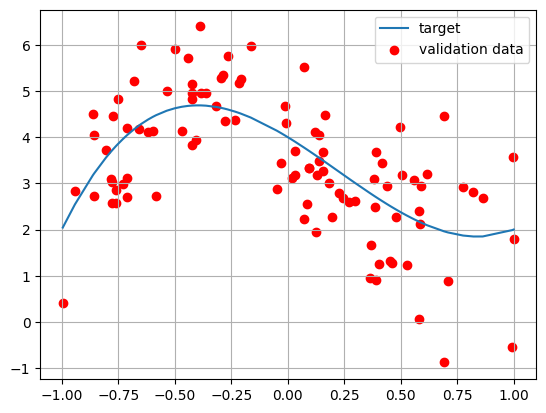

In [160]:
# plot validation and target dataset

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [169]:
# compose the NN model


model = tf.keras.Sequential()
model.add(Dense(10, input_shape=(1,),activation='relu'))
model.add(Dense(10, input_shape=(1,),activation='relu'))
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 10)                20        
                                                                 
 dense_45 (Dense)            (None, 10)                110       
                                                                 
 dense_46 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


Ho usato un modello a due layer per la rete neurale, con layer da 40 neuroni con attivazione relu, questo modello mi fornisce un buon grado di flessibilità anche per casi con sigma più alta. Per casi a sigma bassa è chiaramente eccessivo. Ho utilizzato come funzione di loss l'errore quadrarico medio e come ottimizzatore Nadam che ho trovato far convergere velocemente il sistema.

In [170]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
157/157 [==============================] - 1s 2ms/step - loss: 8.4118 - mse: 8.4118 - val_loss: 4.3181 - val_mse: 4.3181
Epoch 2/20
157/157 [==============================] - 0s 2ms/step - loss: 2.4394 - mse: 2.4394 - val_loss: 1.7693 - val_mse: 1.7693
Epoch 3/20
157/157 [==============================] - 0s 2ms/step - loss: 1.5533 - mse: 1.5533 - val_loss: 1.5209 - val_mse: 1.5209
Epoch 4/20
157/157 [==============================] - 0s 1ms/step - loss: 1.3178 - mse: 1.3178 - val_loss: 1.3543 - val_mse: 1.3543
Epoch 5/20
157/157 [==============================] - 0s 1ms/step - loss: 1.1691 - mse: 1.1691 - val_loss: 1.2614 - val_mse: 1.2614
Epoch 6/20
157/157 [==============================] - 0s 1ms/step - loss: 1.1015 - mse: 1.1015 - val_loss: 1.2080 - val_mse: 1.2080
Epoch 7/20
157/157 [==============================] - 0s 1ms/step - loss: 1.0643 - mse: 1.0643 - val_loss: 1.1655 - val_mse: 1.1655
Epoch 8/20
157/157 [==============================] - 0s 1ms/step - loss: 1.

In [171]:
# return weights and biases
model.get_weights()

[array([[-0.03846516, -0.7137817 ,  0.46834585,  0.4626935 , -0.03114634,
         -0.13645783,  0.89618003,  0.46629748, -0.6878563 ,  0.47449833]],
       dtype=float32),
 array([-0.04317513,  0.3621559 ,  0.47386685,  0.20870118, -0.03504691,
         0.3516752 ,  0.15795024,  0.47314194,  0.27239972,  0.48210913],
       dtype=float32),
 array([[ 7.38395005e-03,  6.45684898e-02, -1.95462406e-01,
          1.26924112e-01, -1.53907642e-01,  3.51348400e-01,
          3.49344611e-02, -1.81494400e-01, -1.65092796e-01,
          2.44049467e-02],
        [-2.27240115e-01,  3.61407429e-01, -1.04656769e-02,
          6.74357831e-01, -2.70504206e-01, -4.80030067e-02,
          4.94486332e-01,  1.77843556e-01,  6.11901045e-01,
          2.32636198e-01],
        [ 2.29778990e-01,  4.97361749e-01,  6.76810682e-01,
          6.60489917e-01,  5.04302263e-01,  2.02179849e-01,
         -1.60394955e+00,  6.30284727e-01,  1.97870106e-01,
         -4.43161190e-01],
        [ 8.24740827e-01, -1.0262428

In [172]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 1.0910 - mse: 1.0910

Test loss: 1.0909794569015503
Test accuracy: 1.0909794569015503


In [173]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.0089 - mse: 0.0089

Test loss: 0.008911652490496635
Test accuracy: 0.008911652490496635


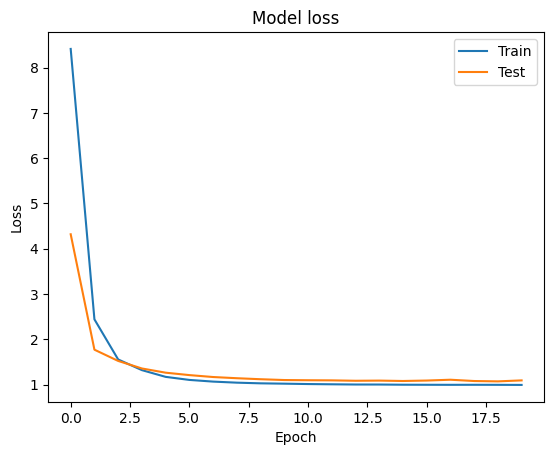

In [174]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


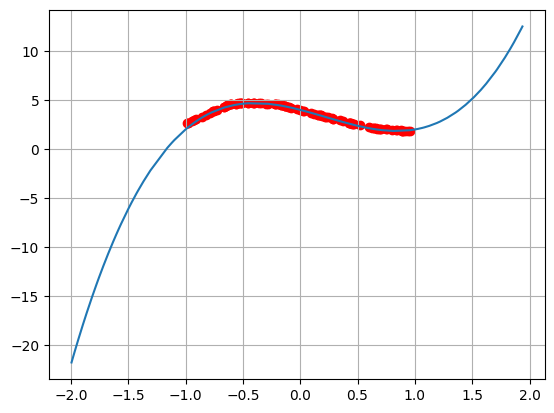

In [175]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_draw, y_draw)
plt.grid(True)
plt.show()

4/4 [==============================] - 0s 941us/step


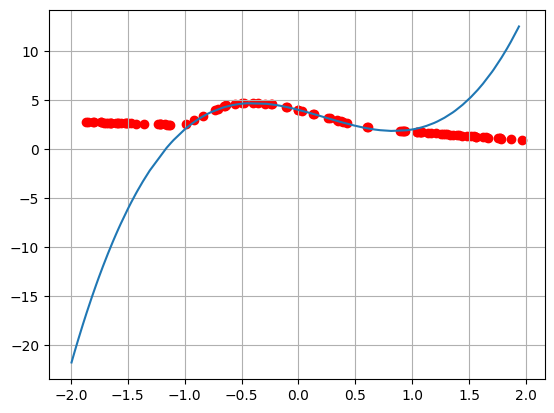

In [176]:
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_draw, y_draw)
plt.grid(True)
plt.show()

La rete neurale riesce a produrre un buon fit nell'intervallo in cui le ho fornito i dati ma non è assolutamente  in grado di estenderlo al di fuori di quell'intervallo, dove predice valori con andamento costante. Ho provato a cambiare i parametri della rete: numero di layer, numero di neuroni, ottimizzatore, ecc. ma non sono riuscito a ottenere un fit anche solo decente al di fuori dell'intervallo in cui le fornisco i dati. Questo mi fa pensare che le reti neurali facciano molta fatica a prevedere dati che non assomigliano moltissimo a ciò su cui sono state allenate.  
Mi sono accorto che aumentare il numero dei parametri, ossia dei neuroni e degli strati della rete, aiuta a fittare sistemi più complessi ma che non bisogna esagerare. In primo luogo un numero troppo alto di parametri rischia di produrre overfitting, ossia che la rete predica in un modo che tiene anche in considerazione le fluttuazioni random dei dati di training e non solo il loro andamento generale. Poi un aumento eccessivo del numero dei parametri causa un allungamento significativo dei tempi di allenamento della rete senza produrre risultati significativamente migliori. Sicuramente non servono 5 strati da 400 neuroni per fare il fit di una funzione lineare!

# Esercizio 11.3

Provo a costruire una rete neurale che fitti la funzione trigonometrica bidimensionale:
$$f(x,y) = \sin(x^2+y^2)$$
per $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [190]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-3/2,3/2,5000)
y_train = np.random.uniform(-3/2,3/2,5000)
x_valid = np.random.uniform(-3/2,3/2,100)
y_valid = np.random.uniform(-3/2,3/2,100)

z_target = np.sin(x_valid**2+x_valid**2) # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
z_train = np.random.normal(np.sin(x_train**2+y_train**2), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(np.sin(x_valid**2+y_valid**2), sigma)

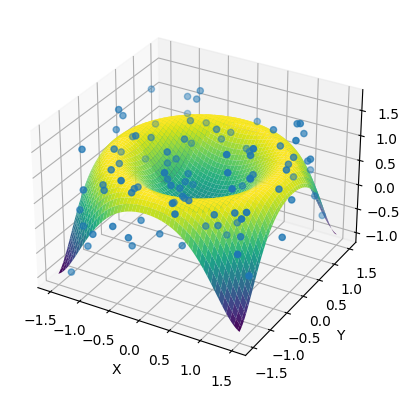

In [191]:
# Costruisco il grafico della funzione attesa
x = np.linspace(-3/2, 3/2, 100)
y = np.linspace(-3/2, 3/2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X**2 + Y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.plot_surface(X, Y, Z, cmap='viridis')
ax.scatter(x_valid,y_valid,z_valid)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [192]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(2,),activation='relu'))
model.add(Dense(10, input_shape=(1,),activation='relu'))
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='Nadam', loss='mse', metrics=['mse'])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 20)                60        
                                                                 
 dense_48 (Dense)            (None, 10)                210       
                                                                 
 dense_49 (Dense)            (None, 1)                 11        
                                                                 
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


Cerco di mantenere un numero abbastanza basso di parametri, per evitare overfitting e calcoli inutili

In [193]:
#formatto la forma dei miei dati per poterli passae al modello
xy_train=np.column_stack((x_train,y_train))
xy_valid=np.column_stack((x_valid,y_valid))


In [194]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data

history = model.fit(x=xy_train, y=z_train, 
          batch_size=32, epochs=40,
          shuffle=True,
          validation_data=(xy_valid, z_valid))

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 0.5573 - mse: 0.5573 - val_loss: 0.3593 - val_mse: 0.3593
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3913 - mse: 0.3913 - val_loss: 0.3465 - val_mse: 0.3465
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3799 - mse: 0.3799 - val_loss: 0.3275 - val_mse: 0.3275
Epoch 4/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3689 - mse: 0.3689 - val_loss: 0.3270 - val_mse: 0.3270
Epoch 5/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3585 - mse: 0.3585 - val_loss: 0.3122 - val_mse: 0.3122
Epoch 6/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3484 - mse: 0.3484 - val_loss: 0.3054 - val_mse: 0.3054
Epoch 7/40
157/157 [==============================] - 0s 1ms/step - loss: 0.3365 - mse: 0.3365 - val_loss: 0.2994 - val_mse: 0.2994
Epoch 8/40
157/157 [==============================] - 0s 1ms/step - loss: 0.

In [195]:
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 1ms/step - loss: 0.2579 - mse: 0.2579

Test loss: 0.25791260600090027
Test accuracy: 0.25791260600090027


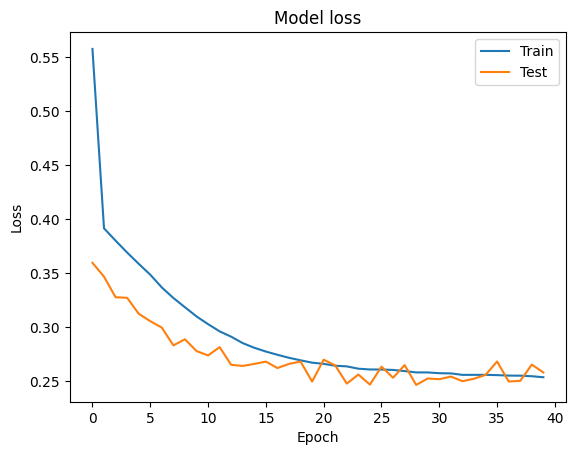

In [196]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [197]:
x_predicted = np.random.uniform(-3/2, 3/2, 100)
y_predicted = np.random.uniform(-3/2, 3/2, 100)


#riformatto i dati per disegnarli
xy_predicted=np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(xy_predicted)


x = np.linspace(-3/2, 3/2, 100)
y = np.linspace(-3/2, 3/2, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(X**2 + Y**2)



4/4 [==============================] - 0s 1ms/step


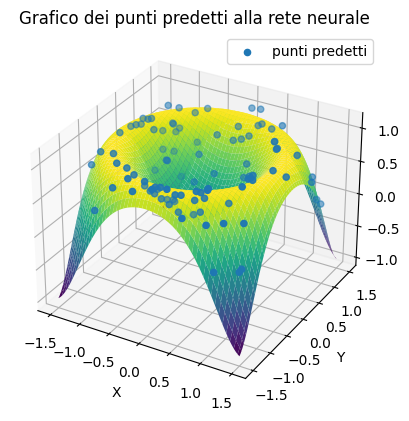

In [198]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')


ax.scatter(x_predicted,y_predicted,z_predicted,label='punti predetti')


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Grafico dei punti predetti alla rete neurale')
ax.legend()

plt.show()

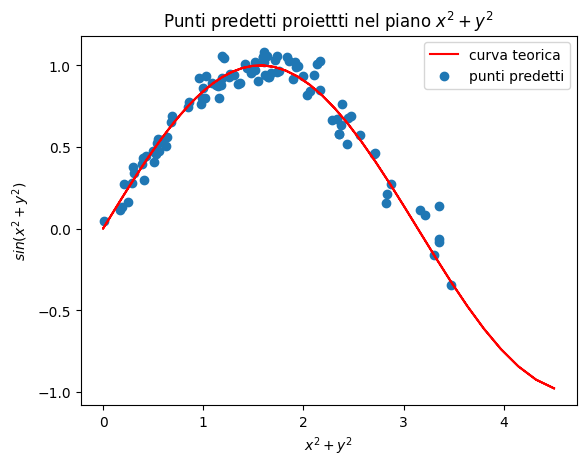

In [201]:
plt.plot(x**2+y**2,np.sin(x**2+y**2),label='curva teorica',color='r')
plt.scatter(x_predicted**2+y_predicted**2,z_predicted,label='punti predetti')
plt.legend()
plt.xlabel('$x^2+y^2$')
plt.ylabel('$sin(x^2+y^2)$')
plt.title('Punti predetti proiettti nel piano $x^2+y^2$')
plt.show()

Sono riuscito ad ottenere un fit abbastanza buono della funzione, ho cercato di evitare overfitting e di usare un numero ragionevole di neuroni, punti e epoche.